Tutorial Machine Learning for Beginner dari DQLab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

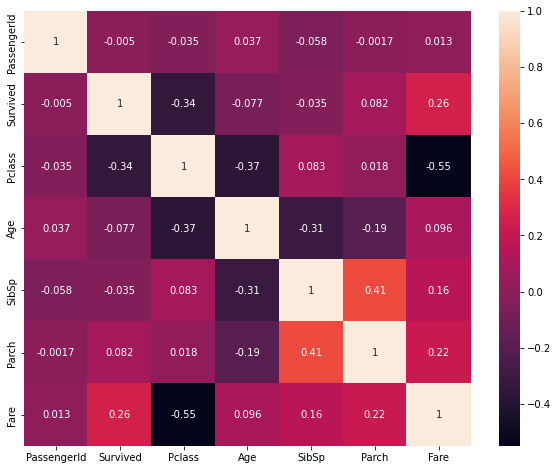

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Korelasi paling kuat adalah Survived-Fare dan Parch SibSb

In [ ]:
print('Distribusi Label Survived:\n', df['Survived'].value_counts())

Distribusi Label Survived:
 0    549
1    342
Name: Survived, dtype: int64


Berarti imbalance data karena gak seimbang antara yg survived dan no survived

In [ ]:
a = df.corr().loc['Fare','Survived']
b = df.corr().loc['Parch','SibSp']

print('Korelasi Fare dan Survived:\n', a)
print('Korelasi Parch dan SibSp:\n', b)

Korelasi Fare dan Survived:
 0.2573065223849626
Korelasi Parch dan SibSp:
 0.41483769862015624


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


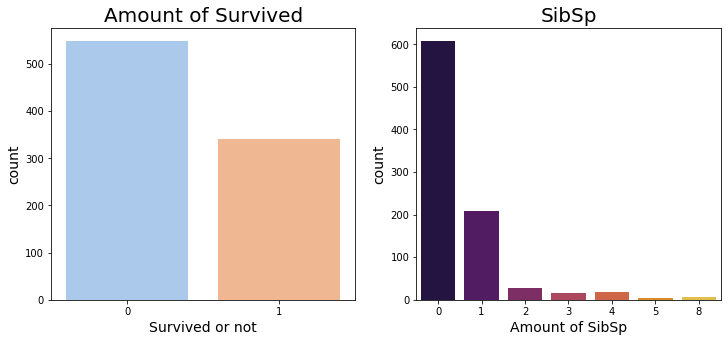

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


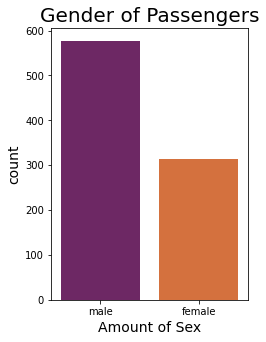

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


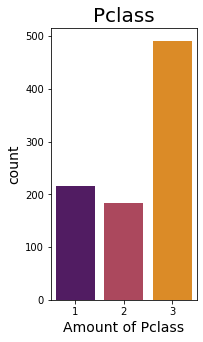

In [ ]:
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(df['Survived'], palette = 'pastel')
plt.title('Amount of Survived', fontsize = 20)
plt.xlabel('Survived or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.subplot(1, 2, 2)
sns.countplot(df['SibSp'], palette = 'inferno')
plt.title('SibSp', fontsize = 20) 
plt.xlabel('Amount of SibSp', fontsize = 14)
plt.ylabel('count', fontsize=14)
plt.show()

plt.subplot(1, 3, 1)
sns.countplot(df['Sex'], palette = 'inferno')
plt.title('Gender of Passengers', fontsize = 20) 
plt.xlabel('Amount of Sex', fontsize = 14)
plt.ylabel('count', fontsize=14)
plt.show()

plt.subplot(1, 4, 1)
sns.countplot(df['Pclass'], palette = 'inferno')
plt.title('Pclass', fontsize = 20) 
plt.xlabel('Amount of Pclass', fontsize = 14)
plt.ylabel('count', fontsize=14)
plt.show()

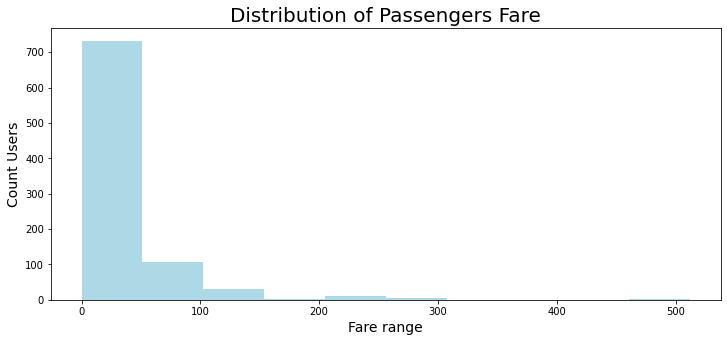

In [ ]:
plt.hist(df['Fare'], color = 'lightblue')
plt.title('Distribution of Passengers Fare', fontsize = 20)
plt.xlabel('Fare range', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
print('Total jumlah missing value:\n', df.isna().sum().sum())

Total jumlah missing value:
 866


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df = df.drop('Name', axis=1)
df = df.drop('Ticket', axis=1)

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

NameError: ignored

In [ ]:
df.shape

(889, 9)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [ ]:
scalling_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
df[scalling_columns] = scaler.fit_transform(df[scalling_columns])

In [ ]:
print(df[scalling_columns].describe().T[['min','max']])

       min  max
Age    0.0  1.0
SibSp  0.0  1.0
Parch  0.0  1.0
Fare   0.0  1.0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.367347,0.065523,0.063742,0.062649
std,256.998173,0.486260,0.834700,0.162960,0.137963,0.134460,0.097003
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.271174,0.000000,0.000000,0.015412
50%,446.000000,0.000000,3.000000,0.367921,0.000000,0.000000,0.028213
75%,668.000000,1.000000,3.000000,0.434531,0.125000,0.000000,0.060508
max,891.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
print(LE.classes_)
print(np.sort(df['Sex'].unique()))
print('')

LE = LabelEncoder()
df['Embarked'] = LE.fit_transform(df['Embarked'])
print(LE.classes_)
print(np.sort(df['Embarked'].unique()))
print('')

['female' 'male']
[0 1]

['C' 'Q' 'S']
[0 1]



In [ ]:
df['Embarked'].value_counts()

2    644
0    168
1     77
Name: Embarked, dtype: int64

Proses Modelling

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (889, 8)
Shape of y:  (889,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (711, 8)
Shape of y_train:  (711,)
Shape of X_test:  (178, 8)
Shape of y_test:  (178,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model = model.fit(X_train,y_train)

In [ ]:
y_predict = model.predict(X_test)
print('Shape of y_predict: ', y_predict.shape)

Shape of y_predict:  (178,)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7078651685393258


In [ ]:
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)


Confusion matrix:
[[81 24]
 [28 45]]


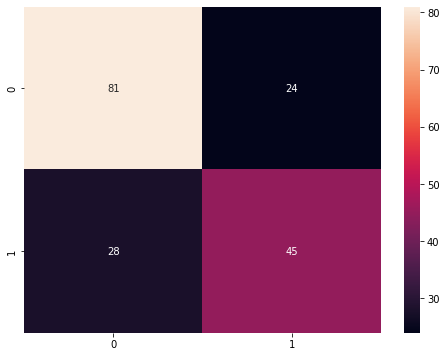

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('\nClassification report:')
cr = classification_report(y_test, y_predict)
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       105
           1       0.65      0.62      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



ML Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 
logreg = logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test)) 

Training Accuracy : 0.8213783403656821
Testing Accuracy : 0.7191011235955056



Confusion matrix


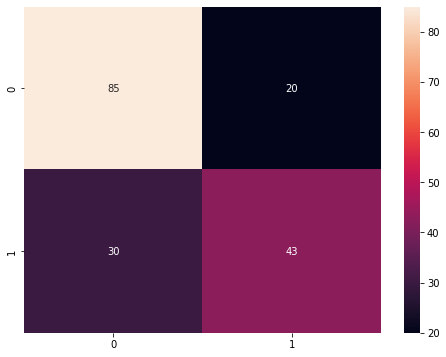

In [ ]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_predict)  

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('\nClassification report')  
cr = classification_report(y_test, y_predict)  
print(cr)


Classification report
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       105
           1       0.68      0.59      0.63        73

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print('Training Accuracy :', knn.score(X_train, y_train))  
print('Testing Accuracy :', knn.score(X_test, y_test)) 

Training Accuracy : 0.7130801687763713
Testing Accuracy : 0.601123595505618



Confusion matrix


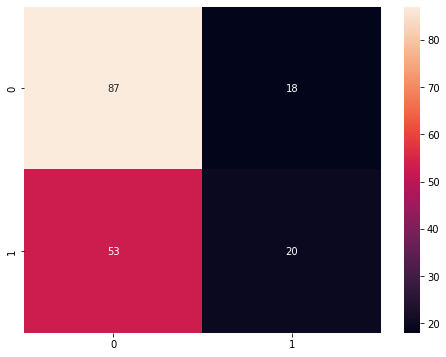

In [ ]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)


Classification report
              precision    recall  f1-score   support

           0       0.62      0.83      0.71       105
           1       0.53      0.27      0.36        73

    accuracy                           0.60       178
   macro avg       0.57      0.55      0.54       178
weighted avg       0.58      0.60      0.57       178



ML Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [ ]:
print('Training Accuracy :', classifier.score(X_train, y_train))  
print('Testing Accuracy :', classifier.score(X_test, y_test)) 

Training Accuracy : 0.6244725738396625
Testing Accuracy : 0.5898876404494382



Confusion matrix


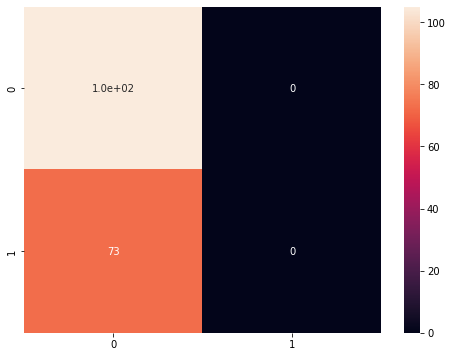

In [ ]:
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_predict)  
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.show()

In [ ]:
print('\nClassification report')  
cr = classification_report(y_test, y_predict)  
print(cr)


Classification report
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       105
           1       0.00      0.00      0.00        73

    accuracy                           0.59       178
   macro avg       0.29      0.50      0.37       178
weighted avg       0.35      0.59      0.44       178



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pake Logistic Regression

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test = test.drop('Name', axis=1)
test = test.drop('Ticket', axis=1)
test = test.drop('Cabin', axis=1)

In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [ ]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
test.isna().sum().sum()

0

In [ ]:
test[scalling_columns] = scaler.fit_transform(test[scalling_columns])

In [ ]:
LE = LabelEncoder()
test['Sex'] = LE.fit_transform(test['Sex'])
print(LE.classes_)
print(np.sort(test['Sex'].unique()))
print('')

LE = LabelEncoder()
test['Embarked'] = LE.fit_transform(test['Embarked'])
print(LE.classes_)
print(np.sort(test['Embarked'].unique()))
print('')

['female' 'male']
[0 1]

['C' 'Q' 'S']
[0 1 2]



In [ ]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,0.396975,0.055921,0.043594,0.069540,1.401914
std,120.810458,0.841838,0.481622,0.166617,0.112095,0.109048,0.108993,0.854496
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.301068,0.000000,0.000000,0.015412,1.000000
50%,1100.500000,3.000000,1.000000,0.396975,0.000000,0.000000,0.028213,2.000000
75%,1204.750000,3.000000,1.000000,0.469207,0.125000,0.000000,0.061484,2.000000
max,1309.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
final_predict = logreg.predict(test)

In [ ]:
dataframe_result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': final_predict})

In [ ]:
dataframe_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
dataframe_result['Survived'].value_counts()

0    260
1    158
Name: Survived, dtype: int64

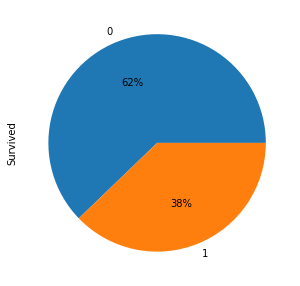

In [ ]:
dataframe_result['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [ ]:
dataframe_result.to_csv('submission3.csv', index=False)

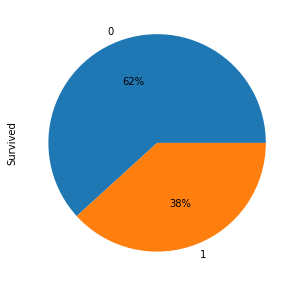

In [ ]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.0f%%')